<h1 align='center'><b><font color='indianred'></p>Spam Detection</b></h1>


# <font color='indianred'> **Load the dataset**

- Usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe. 

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color = 'sky blue'>Install and import modules

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Not Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install  -U spacy  -q
    !pip install wordcloud
    !pip install swifter
    !pip install -U nltk -qq
    !python -m spacy download en_core_web_sm -qq
else:
    !pip install  -U spacy  -q
    !pip install wordcloud
    !pip install swifter
    !pip install -U nltk -qq
    !python -m spacy download en_core_web_sm -qq

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.cpu_count()

16

# <font color = 'sky blue'> Mount and set project location

In [5]:
from pathlib import Path
import sys
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

In [6]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path(r'/content/drive/MyDrive/NLP/data/')
else:
    base_folder = Path(r'C:\Users\kadiy\Downloads\UTD\UTDSEM5\NLP\HW\3')

In [7]:
data_folder = base_folder/'datasets/'
archive_folder = base_folder/'archive'
custom_function_folder = base_folder/'custom-functions'

In [8]:
sys.path.append(str(custom_function_folder))

In [9]:
sys.path

['C:\\Users\\kadiy\\Downloads\\UTD\\UTDSEM5\\NLP\\HW\\3',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\kadiy\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\kadiy\\.ipython',
 'C:\\Users\\kadiy\\Downloads\\UTD\\UTDSEM5\\NLP\\HW\\3\\custom-functions']

In [10]:
# Import spacy for NLP
import spacy 
# Import pandas for dataframes
import pandas as pd

# Import swifter for parallelization
import swifter

# Import re for regex
import re

# Import tarfile, zipfile for decompressing files
import tarfile
import zipfile

# import matplotliob, wordcloud for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# import custom spacy preprocessors
from custom_preprocessor_mod import SpacyPreprocessor
from featurizer import ManualFeatures
from plot_learning_curve import plot_learning_curve
# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

#Import XGBoost Classifier
from xgboost import XGBClassifier

In [11]:
spacy.__version__

'3.5.0'

# <font color = 'sky blue'> Downloading data  

In [12]:
file = archive_folder/'archive.zip'

In [ ]:
# use wget to download the data
URL = 'https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1'
!wget {URL} -P {archive_folder} -O {file}

--2023-02-22 14:42:51--  https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/download?datasetVersionNumber=1
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fuciml%2Fsms-spam-collection-dataset%2Fversions%2F1%3Fresource%3Ddownload [following]
--2023-02-22 14:42:51--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fuciml%2Fsms-spam-collection-dataset%2Fversions%2F1%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/drive/MyDrive/NLP/data/archive/archive.zip’

archive.zip             [ <=>   

In [13]:
# Check directly if the file exists in the archive folder:
(archive_folder/'archive.zip').exists()

True

In [14]:
# Check content of the zip file
with  zipfile.ZipFile(file, 'r') as zip:
  zip_names = zip.filelist

In [15]:
zip_names

[<ZipInfo filename='spam.csv' compress_type=deflate file_size=503663 compress_size=215780>]

In [20]:
# Extract the files from the zip file
with  zipfile.ZipFile(file, 'r') as zip:
  zip.extractall(path = data_folder)

# <font color = 'sky blue'> Load dataset

In [16]:
spam_data = pd.read_csv(data_folder/'spam.csv', encoding='cp1252', usecols = [0,1], names = ['label', 'message'], skiprows = [0])

In [17]:
spam_data.shape

(5572, 2)

# <font color = 'sky blue'> Calculate spam and ham percent

In [18]:
print('spam percentage {:.2f}%'.format(spam_data.loc[spam_data.label=='spam'].shape[0]*100/spam_data.shape[0]))

spam percentage 13.41%


In [19]:
print('ham percentage {:.2f}%'.format(spam_data.loc[spam_data.label=='ham'].shape[0]*100/spam_data.shape[0]))

ham percentage 86.59%


In [20]:
spam_data.label = spam_data.label.replace({'ham':0,'spam':1})

# <font color='indianred'> **Provide the metric for evaluating model**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

### <font color = 'sky blue'>precision is the proportion of true positivies to all positive predictions = TP/(TP + FP)
### <font color = 'sky blue'> recall is the proportion of true positivies to all positive actuals = TP/(TP + FN)
### <font color = 'sky blue'> We don't want our ham values to be predicted as spam. So precision is a good metric as we want less false positives (considering spam as positive prediction).
### <font color = 'sky blue'> If we want to optimize for minimizing false negatives i.e., predicting a message as ham when it's actually spam, we can use recall as our evaluation metric.
### <font color = 'sky blue'> F-1 score = 2(precision)(recall)/(precision + recall) is a good metric for a overall balance of both precision and recall

# <font color='indianred'> **Classification Pipelines**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* Use following methods to create fearures which you can use in your model. 

    1. Sparse Embeddings (TF-IDF)
    2. Feature Engineering
    3. Sparse Embeddings (TF-IDF) + Feature Engineering

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on the analysis (e.g. model score, learning curves) , choose one pipeline from the three.** </font>

**Requirements:** 

1. We can use any ML model (Logistic Regression, XgBoost) for the classification. We need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, We can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what features can distinguish a spam from a regular email. Some examples :

> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/). 

3. For Sparse embeddings use **tfidf vectorization**. We need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.). 

# <font color = 'sky blue'> Creating data subset

In [21]:
spam_data_10_percent = spam_data.sample(frac=0.1, replace=True, random_state=10)

In [22]:
spam_X = spam_data_10_percent['message']
spam_Y = spam_data_10_percent['label']

In [23]:
train_X, test_X, train_Y, test_Y = train_test_split(spam_X, spam_Y, test_size = 0.2, random_state=10)

In [24]:
print(train_X.shape[0])
print(train_Y.shape[0])
print(test_X.shape[0])
print(test_Y.shape[0])

445
445
112
112


# <font color = 'sky blue'> Exploratory Data Analysis

In [25]:
spam_data_10_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 1289 to 389
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    557 non-null    int64 
 1   message  557 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [26]:
train_Y.value_counts()

0    387
1     58
Name: label, dtype: int64

In [27]:
test_Y.value_counts()

0    99
1    13
Name: label, dtype: int64

In [28]:
def create_word_cloud(data: pd.DataFrame, category: str) -> None:
    """
    Creates a word cloud from the text data in a specified category of a Pandas DataFrame.
    
    Parameters:
    data (pd.DataFrame): A Pandas DataFrame that contains the data to be used for creating the word cloud.
                         It has two columns: "label" and "message". The "label" column is used to filter
                         the data based on a specific category, and the "message" column contains the text data.
    category (str): The category used to filter the data. Only the messages that belong to this category will be
                    used for creating the word cloud.
    
    Returns:
    None: This function does not return anything, it only displays the generated word cloud.
    """
    comment_words = ""
    comment_words += " ".join(list(data.loc[data.label==category].message.str.lower()))+" "
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          min_font_size=10).generate(comment_words)

    # plot the WordCloud image                      
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()


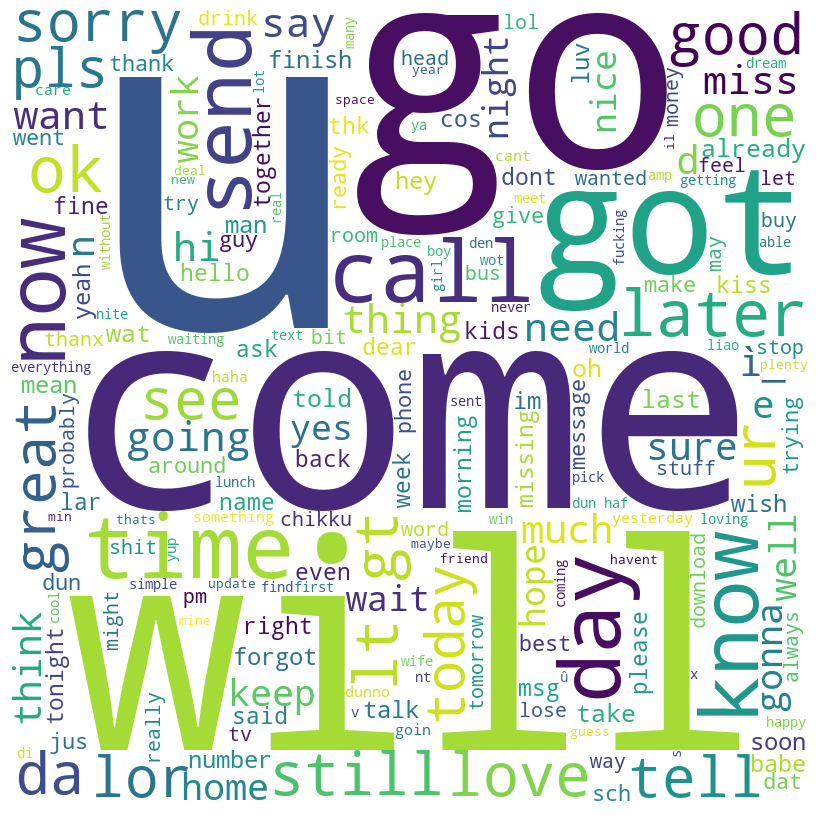

In [29]:
create_word_cloud(spam_data_10_percent ,0)

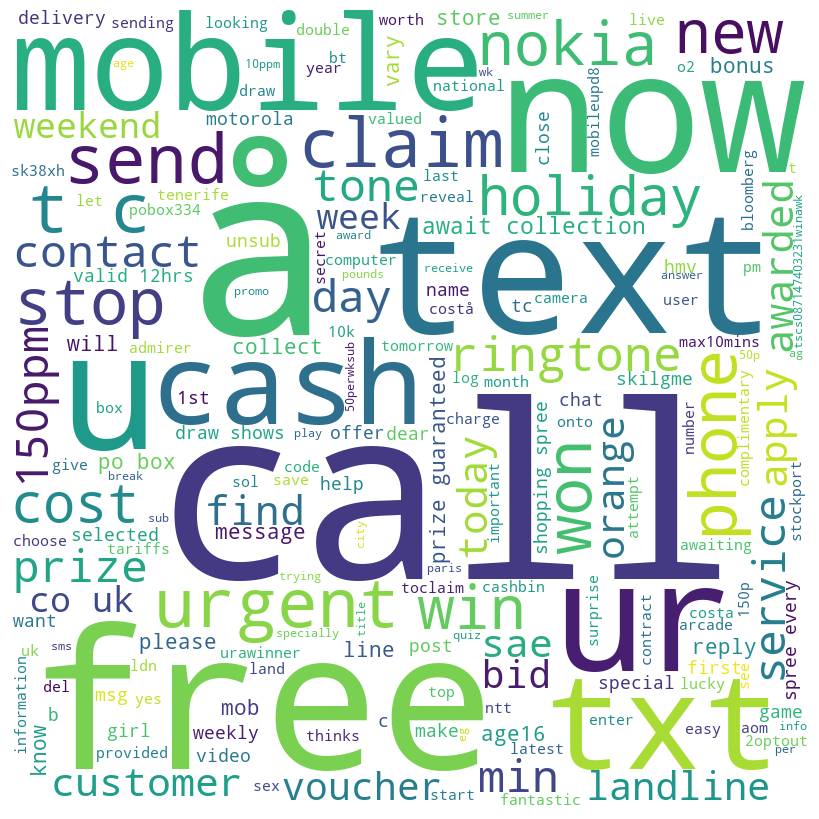

In [30]:
create_word_cloud(spam_data_10_percent ,1)

# <font color = 'sky blue'> Pre-process data

In [31]:
X_train_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(train_X.values)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


## <font color ='sky blue'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

# <font color = 'sky blue'> Create pipeline

In [36]:
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", ngram_range=(1,2))),
    ('classifier', XGBClassifier()),])

# <font color ='sky blue'> GridSearchCV

In [37]:
param_grid_classifier = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],
                            'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]
                           }

In [41]:
grid_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid_classifier, cv = 3, n_jobs=-1, scoring='f1_macro')

# <font color = 'sky blue'> Train model

In [42]:
grid_classifier.fit(X_train_cleaned, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(ngram_range=(1, 2),
                                                        token_pattern='[\\S]+')),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                        

In [43]:
print(f'Best cross-validation score: {grid_classifier.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier.best_params_)
print("\nBest estimator: ", grid_classifier.best_estimator_)

Best cross-validation score: 0.72

Best parameters:  {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 1000, 'vectorizer__max_features': 500}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 token_pattern='[\\S]+')),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id...,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=N

# <font color = 'sky blue'> Plot learning curve

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

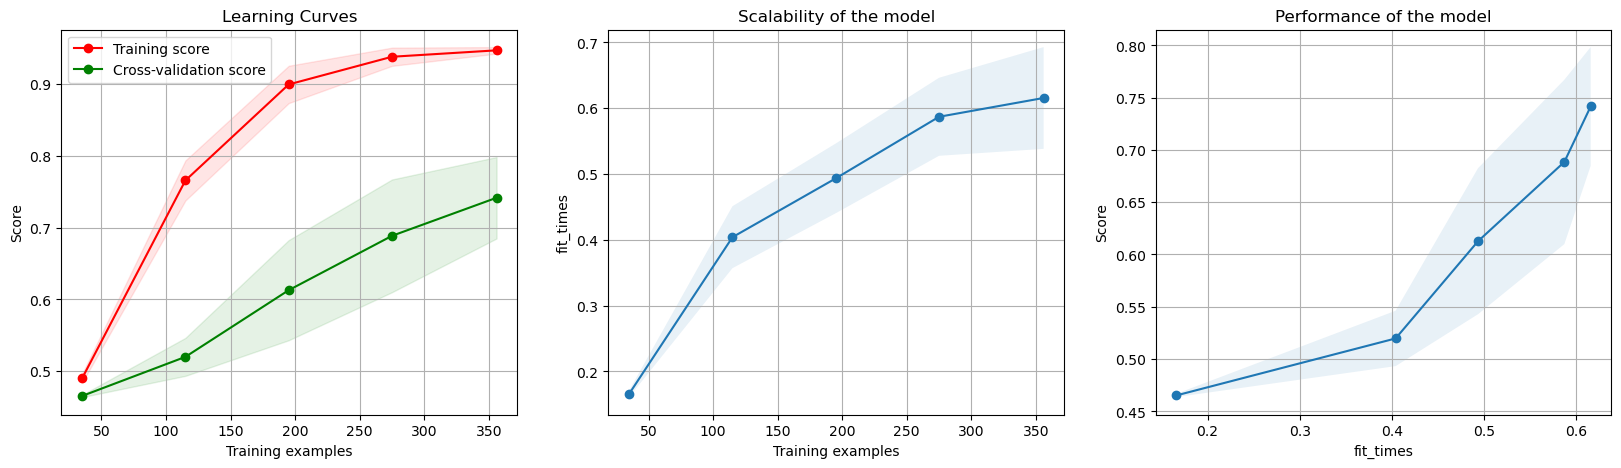

In [46]:
# plot learning curces
plot_learning_curve(grid_classifier.best_estimator_, 'Learning Curves',
                    X_train_cleaned, train_Y, n_jobs=-1, scoring='f1_macro')

## there is overfitting. In case of overfitting we can improve results by 

1. Adding more data (training model on complete dataset)
2. By hyperparameter tuning (reduce model complexity) of model and vectorizer.


In [47]:
# let's check the train scores
print(grid_classifier.best_estimator_.score(X_train_cleaned, train_Y))

# let's check the cross validation score
print(grid_classifier.best_score_)

0.9820224719101124
0.722222291539485


# <font color ='sky blue'> Evaluate test data

In [48]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(text)
    best_estimator = grid_classifier.best_estimator_
    predictions = best_estimator.predict(X_test_cleaned)
    return predictions

In [49]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


# <font color ='sky blue'> Classification Report

In [50]:
print('\nTest set classification report:\n\n', 
      classification_report(test_Y, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.75      0.46      0.57        13

    accuracy                           0.92       112
   macro avg       0.84      0.72      0.76       112
weighted avg       0.91      0.92      0.91       112



## <font color ='sky blue'>**Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

In [51]:
featurizer =  ManualFeatures(spacy_model='en_core_web_sm')

In [52]:
X_features, feature_names = featurizer.fit_transform(train_X.values)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [53]:
X_features.shape

(445, 11)

In [54]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

### <font color ='sky blue'>**Create Pipeline**

In [55]:
classifier_2 = Pipeline([
    ('classifier', XGBClassifier()),
                        ])

# <font color ='sky blue'> Grid Search

In [56]:
param_grid_classifier_2 = {'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]}

In [57]:
grid_classifier_2 = GridSearchCV(estimator=classifier_2,
                                 param_grid=param_grid_classifier_2,
                                 cv=3, n_jobs=-1, scoring='f1_macro')

# <font color ='sky blue'> Training model

In [58]:
# Fit the model on training data
grid_classifier_2.fit(X_features, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                           

In [59]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.93

Best parameters:  {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}

Best estimator:  Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=

# <font color = 'sky blue'> Plot learning curve

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

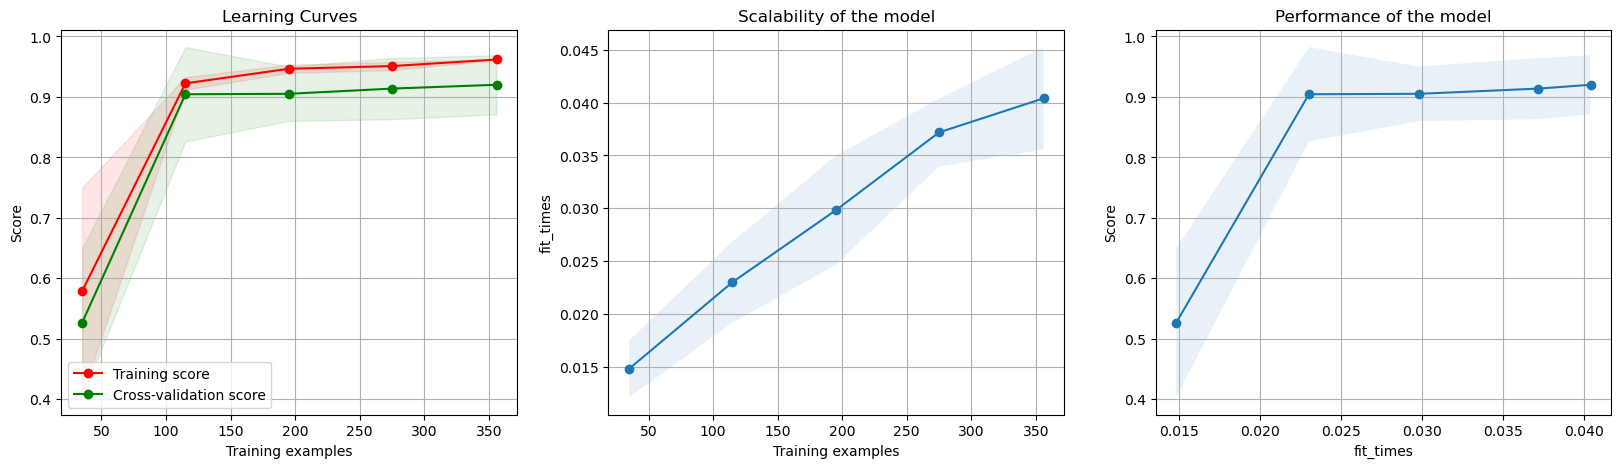

In [60]:
# plot learning curces
plot_learning_curve(grid_classifier_2.best_estimator_, 'Learning Curves',
                    X_features, train_Y, n_jobs=-1, scoring='f1_macro')

## Model is not good as it is not overfitting with even sample data.

In [61]:
# let's check the train scores
print(grid_classifier_2.best_estimator_.score(X_features, train_Y))

# let's check the cross validation score
print(grid_classifier_2.best_score_)

0.9865168539325843
0.925312261224692


# <font color ='sky blue'> Evaluate test data

In [62]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned, feature_names = featurizer.fit_transform(text)
    best_estimator = grid_classifier_2.best_estimator_
    predictions = best_estimator.predict(X_test_cleaned)
    return predictions

In [63]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### <font color ='sky blue'>**Classification report for test dataset**

In [64]:
print('\nTest set classification report:\n\n', 
      classification_report(test_Y, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.81      1.00      0.90        13

    accuracy                           0.97       112
   macro avg       0.91      0.98      0.94       112
weighted avg       0.98      0.97      0.97       112



## <font color ='sky blue'>**Pipeline 3: Combine Manual Features and TfIDF vectors**

In [65]:
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_features, columns=feature_names)), axis =1)

In [66]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner
0,yes princess want catch big strong hand,12.0,57.0,46.0,3.538462,0.0,0.0,0.0,1.0,0.0,2.0,2.0
1,kallis ready bat 2nd innings,8.0,38.0,31.0,3.444444,1.0,1.0,2.0,3.0,1.0,0.0,2.0
2,come u get,7.0,28.0,22.0,2.750000,0.0,0.0,0.0,1.0,0.0,3.0,0.0
3,customer service announcement recently try del...,24.0,137.0,114.0,4.560000,18.0,2.0,1.0,6.0,1.0,6.0,1.0
4,usual u ard 10 smth,8.0,31.0,24.0,2.666667,2.0,1.0,1.0,1.0,1.0,1.0,2.0


In [67]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               445 non-null    object 
 1   count_words                445 non-null    float64
 2   count_characters           445 non-null    float64
 3   count_characters_no_space  445 non-null    float64
 4   avg_word_length            445 non-null    float64
 5   count_digits               445 non-null    float64
 6   count_numbers              445 non-null    float64
 7   noun_count                 445 non-null    float64
 8   aux_count                  445 non-null    float64
 9   verb_count                 445 non-null    float64
 10  adj_count                  445 non-null    float64
 11  ner                        445 non-null    float64
dtypes: float64(11), object(1)
memory usage: 41.8+ KB


In [68]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [69]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+", ngram_range=(1,2))), ])

In [70]:
combined_features = ColumnTransformer(
 transformers=[
     ('tfidf', vectorizer, 'cleaned_text'),
      ], remainder=sparse_features
     )

In [73]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', XGBClassifier()),
                        ])

In [74]:
# We are exploring a small combination of parameters

param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000], 
                           'classifier__n_estimators': [100, 300, 500, 750, 1000],
                         'classifier__learning_rate' : [0.01, 0.05, 0.1]
                          }

In [75]:
# We will now use Gridserach to find fine tune hyperparameters using cross validation

grid_classifier_3 = GridSearchCV(estimator=classifier_3, 
                                 param_grid=param_grid_classifier_3,
                                 cv=3, n_jobs=-1, scoring='f1_macro')

In [76]:
# Fit the model on training data
grid_classifier_3.fit(X_train_final, train_Y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(ngram_range=(1,
                                                                                                                       2),
                                                                                                          token_pattern='[\\S]+'))]),
                                                                         'cleaned_text')])),
                                       ('classifier',
         

# <font color='sky blue'> Best parameters

In [78]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)

Best cross-validation score: 0.93

Best parameters:  {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 750, 'combined_features__tfidf__tfidf__max_features': 500}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   token_pattern='[\\S]+'))]),
                                                  'cleaned_text'

### <font color ='sky blue'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

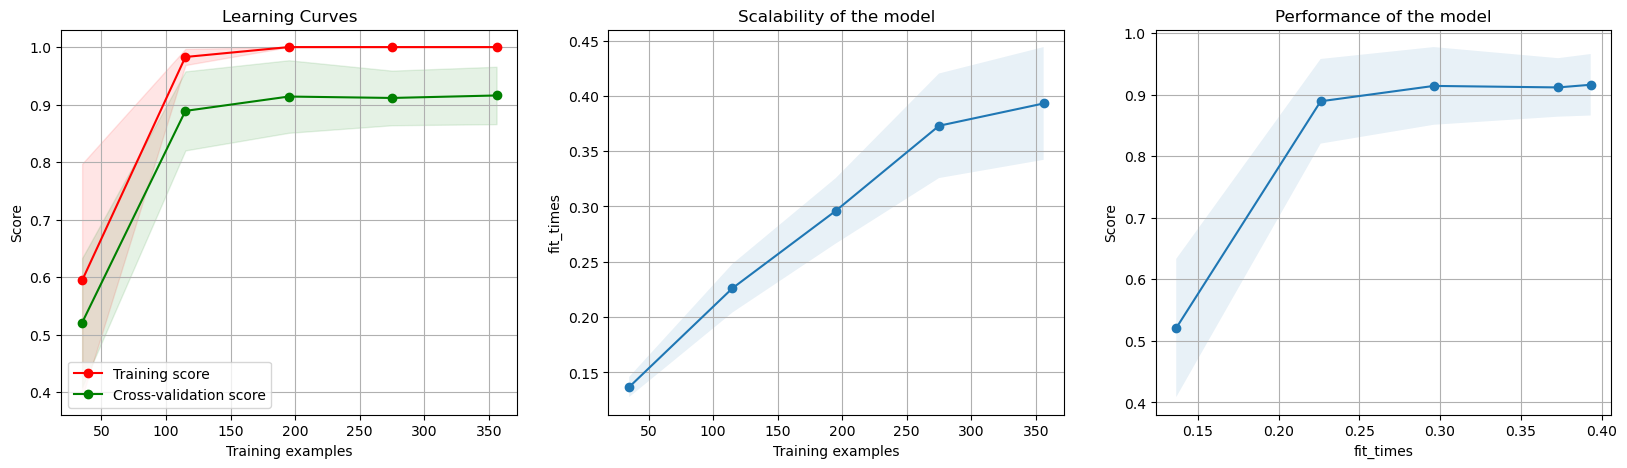

In [79]:
# plot learning curces
plot_learning_curve(grid_classifier_3.best_estimator_, 'Learning Curves',
                    X_train_final, train_Y, n_jobs=-1, scoring='f1_macro')

## Model is overfitting, We can improve it adding more data or reducing complexity.

In [80]:
# let's check the train scores
print(grid_classifier_3.best_estimator_.score(X_train_final, train_Y))

# let's check the cross validation score
print(grid_classifier_3.best_score_)

1.0
0.9299135709478428


### <font color ='sky blue'>**Evaluate model on test datset**

In [81]:
# Final Pipeline
def final_pipeline(text):
    X_test_cleaned = SpacyPreprocessor(model='en_core_web_sm').transform(text)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(X_test_cleaned, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    predictions = grid_classifier_3.best_estimator_.predict(X_final)
    return predictions

In [82]:
# predicted values for Test data set
y_test_pred = final_pipeline(test_X.values)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### <font color ='sky blue'>**Classification report for test dataset**

In [83]:
print('\nTest set classification report:\n\n', classification_report(test_Y, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        99
           1       0.81      1.00      0.90        13

    accuracy                           0.97       112
   macro avg       0.91      0.98      0.94       112
weighted avg       0.98      0.97      0.97       112



# <font color='sky blue'> Overall Pipeline3 seems to be a good choice to improve further by using more data